# Contents:
 1.Data loading
 
 2.Data analysis(EDA)
 
 3.Data visiualistion
 
 4.Feature Extraction

# 1.Data loading

In [1]:
#Library import
import sys

try:
    import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
    warnings.filterwarnings("ignore")
    import librosa
    import scipy
    import wave
    import urllib
    import numpy as np
    import matplotlib.pyplot as plt
    from pydub import AudioSegment
    from pydub.utils import db_to_float
    from pydub.silence import split_on_silence
    from pydub.silence import detect_silence
    import math
    
except ImportError as error:
    print(error)
    print('PLEASE ENSURE YOU HAVE DOWNLOADED ALL THE LIBRARIES PROPERLY')
    print('DLL ERROR ARISES DUE TO IMPROPER INSATLLING OF SCIPY SINCE LIBROSA LIBRARY HAS DEPENDENCY ON SCIPY')
except:
    pass

In [2]:
try:
    data,sampling_rate = librosa.load('human.wav')
    m= data.size

#duration
    duration=int(m/sampling_rate)#duration of audio

#furrier transform of data
    data_fft = np.fft.rfft(data)

#frequencies
    frequencies = np.abs(data_fft)
except:
    print('Ensure file is downloaded and saved in very folder')

# 2. Exploratory Data Analysis

In [3]:
try:
    import pandas as pd
    d=pd.DataFrame(data,columns=["Amplitudes"],index=None)
except Exception as error:
    print(error)
    print('Ensure pandas is dowloaded properly')

In [4]:
d.head()

,Amplitudes
0,7.575186e-07
1,-1.428961e-06
2,6.526796e-06
3,3.472861e-05
4,2.160207e-05


In [5]:
d.describe()

,Amplitudes
count,1.530560e+05
mean,2.565118e-06
std,2.472161e-02
min,-6.056067e-01
25%,-2.186348e-05
50%,-1.262836e-09
75%,2.163452e-05
max,5.496282e-01


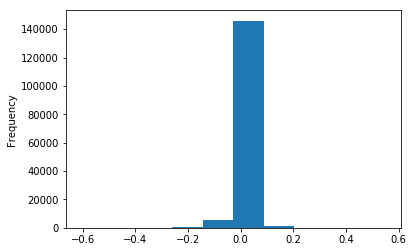

In [6]:
d["Amplitudes"].plot(bins=10,kind='hist')

In [7]:
freq=pd.DataFrame(data_fft)
d["frequencies"]=freq

In [8]:
d.head()

,Amplitudes,frequencies
0,7.575186e-07,(0.392614+0j)
1,-1.428961e-06,(-0.3120233+0.16710901j)
2,6.526796e-06,(0.14005983-0.20298526j)
3,3.472861e-05,(-0.01505713+0.1214083j)
4,2.160207e-05,(-0.0060140905-0.024395395j)


In [9]:
#Since fourier transform i.e F requencies contain imaginary part also
#Droping imaginary part
d.drop(["frequencies"],axis=1,inplace=True)


In [10]:
#considering only real part of frequencies
freq=pd.DataFrame(frequencies)
d["frequencies"]=freq
d.head()

,Amplitudes,frequencies
0,7.575186e-07,0.392614
1,-1.428961e-06,0.353955
2,6.526796e-06,0.246617
3,3.472861e-05,0.122338
4,2.160207e-05,0.025126


In [11]:
#maximum frequency
maxFr=d.sort_values(by="frequencies",ascending=False).head()
maxFr

,Amplitudes,frequencies
16975,0.000034,116.121178
16961,0.000003,109.395721
17191,0.000037,102.854042
16976,0.000023,102.690269
16960,-0.000043,101.416695


In [12]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153056 entries, 0 to 153055
Data columns (total 2 columns):
Amplitudes     153056 non-null float32
frequencies    76529 non-null float32
dtypes: float32(2)
memory usage: 1.2 MB


In [13]:
missing_ratio=(d.isnull().sum()/len(d))*100
missing_ratio.sort_values(ascending=False)

frequencies    49.999347
Amplitudes      0.000000
dtype: float64

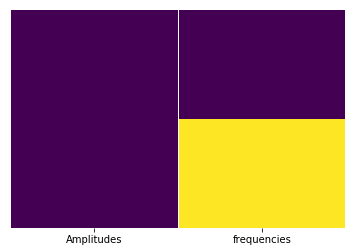

In [14]:
#Checking Null values
try:
    import seaborn as sns
    sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap="viridis")
except:
    print('Import seaborn library')

In [15]:
#for analysing in time domain ,taking only those values which have there defined real part i.e d
#Taking only those which have real part
d.dropna(axis=0,inplace=True)


In [16]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76529 entries, 0 to 76528
Data columns (total 2 columns):
Amplitudes     76529 non-null float32
frequencies    76529 non-null float32
dtypes: float32(2)
memory usage: 1.2 MB


In [17]:
d.describe()

,Amplitudes,frequencies
count,7.652900e+04,76529.000000
mean,-1.483061e-06,5.501440
std,1.776140e-02,7.954611
min,-3.356647e-01,0.000186
25%,-1.197834e-05,0.937076
50%,-7.107457e-09,2.618543
75%,1.192717e-05,6.829189
max,3.150804e-01,116.121178


In [18]:
d['Amplitudes'].unique()

array([ 7.57518592e-07, -1.42896090e-06,  6.52679591e-06, ...,
       -6.63526878e-02,  5.88204339e-03,  5.34593761e-02])

In [19]:
print('Total values of amplitude: '+str(d['Amplitudes'].size))
print('\nUnique values of amplitude: '+str(d['Amplitudes'].nunique()))

Total values of amplitude: 76529

Unique values of amplitude: 76511


# 3. Data visulisation

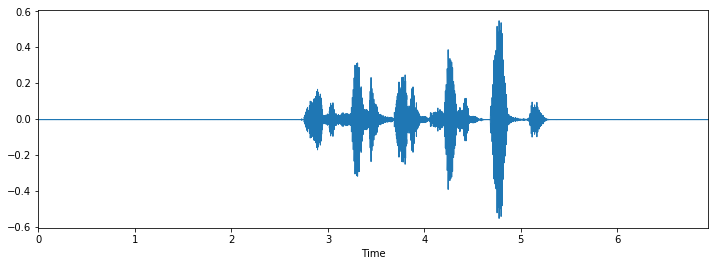

In [20]:
#variation of sound in signal

import glob
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

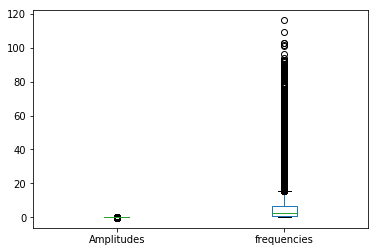

In [21]:
#RANGE OF AMPLITUDES AND FREQUENCIES VALUES
d.plot.box()

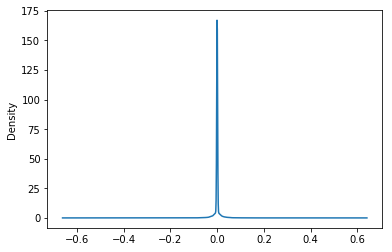

In [22]:
#Density of values of amplitude
d['Amplitudes'].plot.kde()

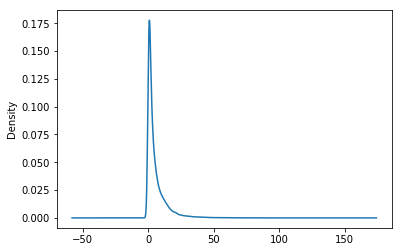

In [23]:
#Density of values of Frequencies
d['frequencies'].plot.kde()

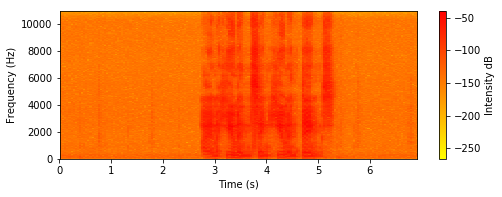

In [24]:
#Spectogram showing INTENSITY  of signal
plt.figure(2, figsize=(8,6))
plt.subplot(211)
Pxx, freqs, bins, im = plt.specgram(data, Fs=sampling_rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity dB')

#maximum intensity is around 250dB

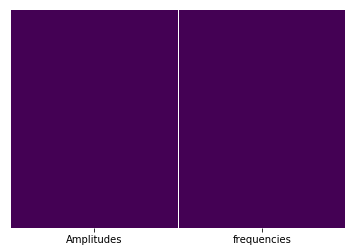

In [25]:
#CHEKING FOR MISSING VALUES
#YELLOW PART REPERESENT NULL VALUES
#NO YELLOW PART , NO MISSING VALUE/NO NULL VALUE
import seaborn as sns
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap="viridis")
#yellow part represents null area
#no yellow part no null value

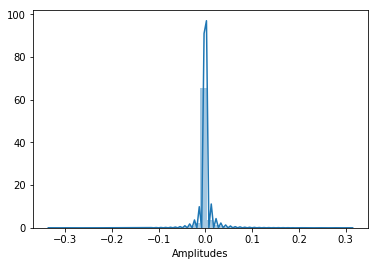

In [26]:
#Distribution of amplitude is around 0.0 to 0.1 (not high)
sns.distplot(d['Amplitudes'])

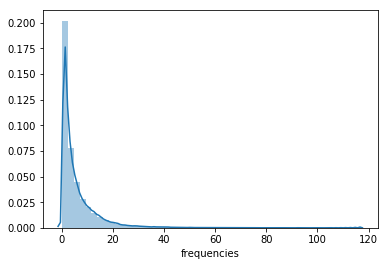

In [27]:
#Distribution of frequencies is around 0.0 to 20(not high)
sns.distplot(d['frequencies'])

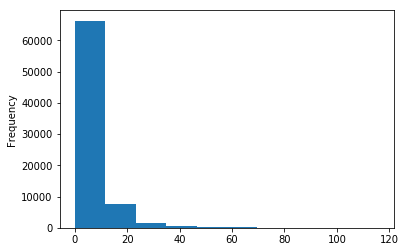

In [28]:
#FREQUENCIES PLOTING

d["frequencies"].plot(bins=10,kind='hist')

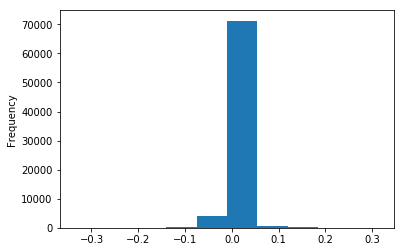

In [29]:
#AMPLITUDES PLOTING
d["Amplitudes"].plot(bins=10,kind='hist')

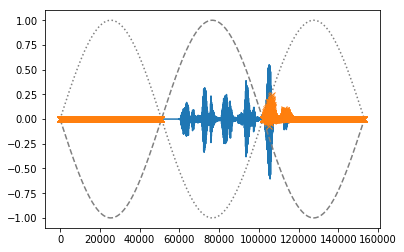

In [30]:
#Peaks in the signal
border = np.sin(np.linspace(0, 3 * np.pi, data.size))
peaks, _ = scipy.signal.find_peaks(data, height=(-border, border))
plt.plot(data)
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, data[peaks], "x")
plt.show()

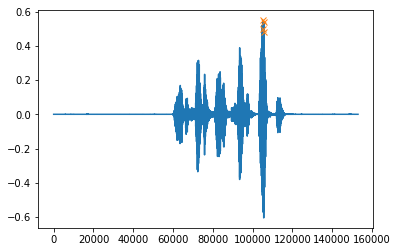

In [31]:
#highest peak detection
#x-mark shows highest pick
peaks, properties = scipy.signal.find_peaks(data, prominence=1, width=1)
plt.plot(data)
plt.plot(peaks, data[peaks], "x")
plt.vlines(x=peaks, ymin=data[peaks] - properties["prominences"],
            ymax = data[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()


In [32]:
properties["prominences"], properties["widths"]


(array([1.02332419, 1.03682661, 1.1096552 , 1.04086971]),
 array([3.83478969, 4.09338501, 4.0346853 , 4.22813586]))

Text(0.5, 0, 'frequencies')

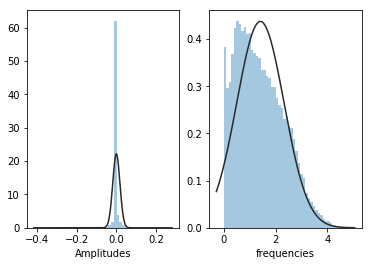

In [33]:
#Normalised distribution of frequencies and Amplitudes
from scipy import stats
from scipy.stats import norm, skew
plt.subplot(1, 2, 1)
sns.distplot(np.log(d.Amplitudes+1), kde=False, fit = norm)

plt.subplot(1, 2, 2)
sns.distplot(np.log(d.frequencies+1), kde=False, fit = norm)
plt.xlabel('frequencies')

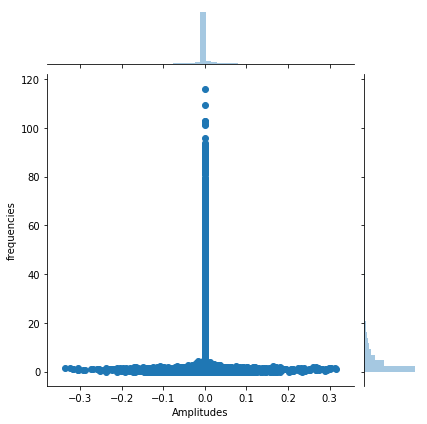

In [34]:
sns.jointplot(x="Amplitudes",y="frequencies",data=d)

# 4.feature extraction

In [35]:
try:
    data,sampling_rate = librosa.load('C:\\Users\\YASHSHAVI KASHYAP\\Downloads\\human.wav')
    m= data.size

#duration
    duration=int(m/sampling_rate)#duration of audio

#furrier transform of data
    data_fft = np.fft.rfft(data)

#frequencies
    frequencies = np.abs(data_fft)

#maximum pitch
    maxp=np.argmax(frequencies)

    arr=[117]*len(frequencies)
    sumf=0
    for i in range(0,len(frequencies)):
        if int(frequencies[i])>0 and int(frequencies[i])<int(maxp):
            arr[i]=int(frequencies[i])
            sumf=sumf+i

    minp=arr.index(min(arr))#min pitch

    meanp=sumf/len(frequencies)#mean pitch

    noofsamples=data.size
#data_fft is fourier transform of data

#total energy
    Et=np.sum(data**2)
    ef=np.sum(frequencies**2)/noofsamples

#power
    power=Et/duration


    plt.figure(2, figsize=(8,6))
    plt.subplot(211)
    Pxx, freqs, bins, im = plt.specgram(data, Fs=sampling_rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
    cbar=plt.colorbar(im)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    cbar.set_label('Intensity dB')
    plt.close()

#minimum intensity
    mini=cbar.vmin
#maximum intensity
    maxi=cbar.vmax

    meani=(mini+maxi)/2
    sound = AudioSegment.from_wav("C:\\Users\\YASHSHAVI KASHYAP\\Downloads\\human.wav")
    chunks = split_on_silence(sound, 
    # must be silent for at least half a second
                    min_silence_len=20,

    # consider it silent if quieter than -16 dBFS
                    silence_thresh=-(round(abs(sound.dBFS))+100)
    )
#1000 means 1 sec then 60 second means
    sixty_seconds = 60 * 1000

    second_1_minute = sound[sixty_seconds:120000]
    hunks = split_on_silence(second_1_minute, 
    # must be silent for at least half a second
                min_silence_len=20,

    # consider it silent if quieter than -16 dBFS
                silence_thresh=-(round(abs(sound.dBFS))+100)
    )
#1000 means 1 sec then 60 second means

#SPEAKING RATE
    speaking_rate=len(hunks)/len(chunks)

#SILENCES
    pauses=detect_silence(sound, min_silence_len=20, silence_thresh=-(round(abs(sound.dBFS))+100), seek_step=1)

#FINDING DURATIONS
    sumd=0
    ls=[]
    for start_i, end_i in pauses:
             dur=int(end_i)-int(start_i)
             ls.append(dur)
    breaks=[]

#VOICE BREAKS
    for i in ls:
        if i >900:
            breaks.append(i)
#SEPRATING BREAKES AND PAUSES
    ls=list(set(ls)-set(breaks))

#PUASES DURATION
    for i in ls:
        sumd=sumd+i

#TOTAL DURATION OF PAUSES
    durp=sumd

#NO OF PAUSES
    nop=len(ls)

#NO OF VOICE BREAKES
    noofVoiceBreaks=len(breaks)

#MAXIMUM DURATION OF PAUSES
    maximum_pause=max(ls)

#AVG DURATION OF PAUSES
    avgp=durp/nop

#FINDING PEAK
    peak,_=scipy.signal.find_peaks(data,rel_height=0.5)

#MAXIMUM FALLING AND MAXIMUM RISING

    MaxFalling=np.amin(data)
    MaxRising=np.amax(peak)
    sums=0



#JITTER, SHIMMER, JITTERRAP 
    for i in range(1,len(peak)-1):
        sums=sums+abs(20*math.log10(peak[i+1]/peak[i]))

#SHIMMER
    shimmer=sums/(len(peak)-1)
    peakf=abs(np.fft.fft(peak))
    sumps=0
    for i in range(1,len(peakf)-1):
        sumps=sumps+(peakf[i+1]**-1)-(peakf[i]**-1)

#JITTER
    jitter=sumps/(len(peakf)-1)
    sortedp=np.sort(peak)
    sortedf=abs(np.fft.fft(sortedp))
    dif=abs(sortedp[11]-sortedp[15])
    suh=0
    avgabsdiff=(dif)/4
    avgneigh1=(abs(sortedp[6]-sortedp[10]))
    avgneigh2=abs(sortedp[17]-sortedp[22])
    avg=(dif+avgneigh1+avgneigh2)/3

    for i in range(11,16):
        suh=suh+abs(sortedf[i]**-1)
    period=suh/5

#JITTERRAP
    jitterrap=(avgabsdiff+avg)/period


#NUMBER OF RISING, NUMBER OF FALLING, AVERAGE RISE, AVERAGE FALL

    noofrise=len(peak)

    avgtorise=noofrise/len(data)
    nooffall=0
    for i in data:   
        if i == np.amin(data):
            nooffall=nooffall+1

    avgtofall=nooffall/len(data)



    print("duration: "+str(duration)+"seconds\n")
    print("energy: "+str(Et)+"joule\n")
    print("power: "+str(power)+"joule/sec\n")
    print("min_pitch: "+str(minp)+"Hz\n")
    print("max_pitch: "+str(maxp)+"Hz\n")
    print("mean_pitch: "+str(meanp)+"Hz\n")
    print("intensityMin: "+str(mini)+"dB\n")
    print("intensityMax: "+str(maxi)+"dB\n")
    print("intensityMean: "+str(meani)+"dB\n")
    print("jitter: "+str(jitter)+"\n")
    print("shimmer: "+str(shimmer)+"dB\n")
    print("jitterRap: "+str(jitterrap)+"\n")
    print("numVoiceBrreaks: "+str(noofVoiceBreaks)+"\n")
    print("PercentBreaks: "+str(((noofVoiceBreaks/duration)*100))+"\n")
    print("speakRate: "+str(speaking_rate)+"wpm\n")
    print("numPauses: "+str(nop)+"\n")
    print("maxDurPauses: "+str(maximum_pause/1000)+"sec\n")
    print("avgDurPauses: "+str(avgp/1000)+"sec\n")
    print("TotDurPauses: "+str(durp/1000)+"sec\n")
    print("MaxRising: "+str(MaxRising)+"dB\n")
    print("MaxFalling: "+str(MaxFalling)+"dB\n")
    print("AvgToRise: "+str(avgtorise)+"dB\n")
    print("AvgToFall: "+str(avgtofall)+"dB\n")
    print("numRising: "+str(noofrise)+"\n")
    print("numFall: "+str(nooffall)+"\n")
except:
    print('Download all libraries properly')

duration: 6seconds

energy: 93.545296joule

power: 15.590882619222006joule/sec

min_pitch: 720Hz

max_pitch: 16975Hz

mean_pitch: 24226.693384207294Hz

intensityMin: -266.15718572457047dB

intensityMax: -39.10700921096199dB

intensityMean: -152.63209746776624dB

jitter: 8.405501496007777e-25

shimmer: 0.0023049956042799397dB

jitterRap: 1155034114.67185

numVoiceBrreaks: 3

PercentBreaks: 50.0

speakRate: 0.14285714285714285wpm

numPauses: 4

maxDurPauses: 0.382sec

avgDurPauses: 0.296sec

TotDurPauses: 1.184sec

MaxRising: 153053dB

MaxFalling: -0.60560673dB

AvgToRise: 0.24982359397867449dB

AvgToFall: 6.533556345389922e-06dB

numRising: 38237

numFall: 1

